<a href="https://colab.research.google.com/github/obaid5172007/code-alpha-project/blob/main/prediction_of_credit_score_using_random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('creditworthiness_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[25 50000 10000 1 700 0]
 [45 120000 30000 0 650 1]
 [35 75000 15000 1 720 0]
 [52 150000 40000 0 630 1]
 [23 32000 8000 1 710 0]
 [40 95000 25000 0 640 1]
 [29 62000 12000 1 690 0]
 [60 130000 35000 0 600 1]
 [33 70000 14000 1 680 0]
 [38 85000 20000 0 660 1]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 0]


visualizing some features

In [ ]:
dataset.head()

,Age,Income,Loan_Amount,Marital_Status,Credit_Score,Previous_Default,Creditworthy
0,25,50000,10000,Single,700,0,1
1,45,120000,30000,Married,650,1,0
2,35,75000,15000,Single,720,0,1
3,52,150000,40000,Married,630,1,0
4,23,32000,8000,Single,710,0,1


# Encoding categorical features of marital column into numeric features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])

In [ ]:
print(X[:, 3])

[1 0 1 0 1 0 1 0 1 0]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.28858423 -0.41028831 -0.43651699 -0.63245553  0.2236068   0.63245553]
 [ 0.32622565  0.6260069   0.51836392 -0.63245553 -0.08944272  0.63245553]
 [-1.07905407 -1.0912823  -1.20042171  1.58113883  1.16275535 -1.58113883]
 [ 1.64367538  0.92209124  0.99580437 -0.63245553 -1.6546903   0.63245553]
 [ 0.94103552  1.51425993  1.47324483 -0.63245553 -0.71554175  0.63245553]
 [-1.430374   -1.44658351 -1.39139789  1.58113883  1.47580487 -1.58113883]
 [-0.11292426 -0.11420396  0.04092347 -0.63245553 -0.40249224  0.63245553]]


In [ ]:
print(X_test)

[[-0.55207417 -0.70637265 -0.91395744  1.58113883  2.1019039  -1.58113883]
 [-0.72773414 -0.85441482 -1.00944553  1.58113883  0.84970583 -1.58113883]
 [-1.60603396 -1.97953533 -1.58237407  1.58113883  1.78885438 -1.58113883]]


## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print("Predicted values:\n", y_pred)
print("Actual values:\n", y_test)

Predicted values:
 [1 1 1]
Actual values:
 [1 1 1]


# Confusion_Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print(cm)

[[0 0]
 [0 3]]


# Visualizing confusion matrix




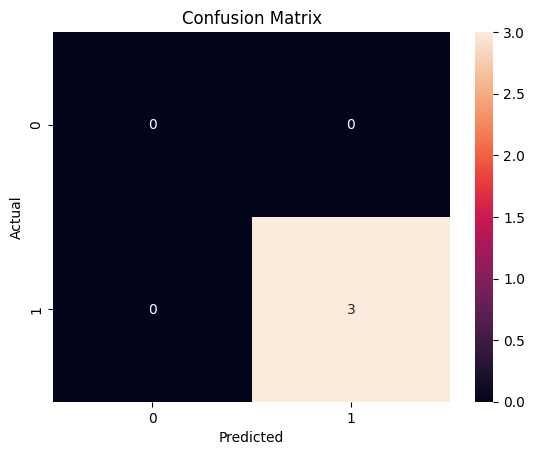

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

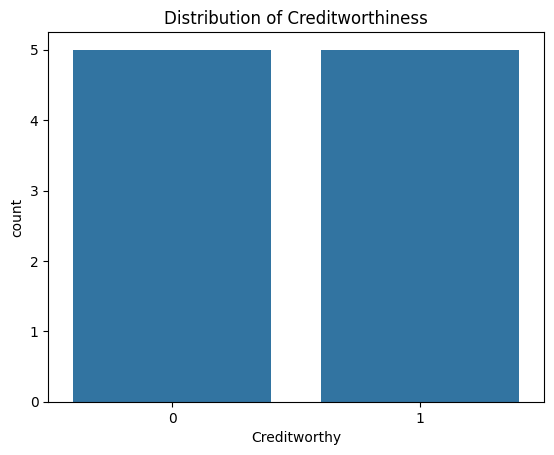

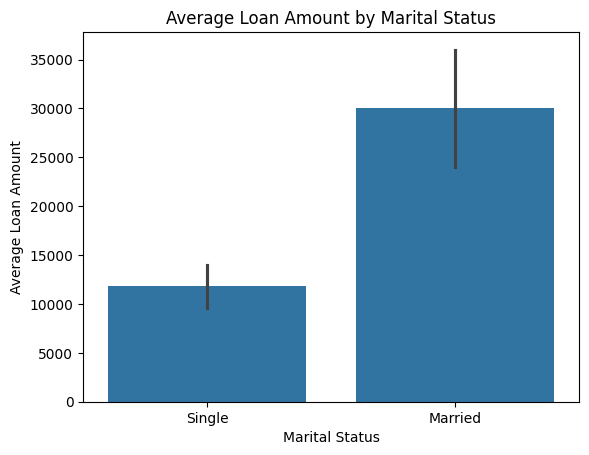

In [ ]:
sns.countplot(x='Creditworthy', data=dataset)
plt.title('Distribution of Creditworthiness')
plt.show()
sns.barplot(x='Marital_Status', y='Loan_Amount', data=dataset)
plt.xlabel('Marital Status')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Marital Status')
plt.show()

# Finding accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


# Predicting creditworthiness of the individual with an age of 40 for satisfaction from the model

In [ ]:
classifier.predict(sc.transform([[40, 95000, 25000, 0, 640, 1 ]]))

array([0])